# 2 Machine Learning Models

## 2.X Random Forest Regression

This notebook runs the Random Forest regression model (an ensemble method based on an averaged (forest) randomised decision tree model) from the SciKit Learn python library (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor).

The problem posed is to predict electricity consumption at a local (LSOA) level, the data is therefore continuous and numerical and is labelled. This lends to supervised machine learning (ML) and regression models.

It is hypothesised that there will be a correlation between mean house price sales (as an indicator of general prosperity and condition of a property) and electricity consumption. This data has previously been cleaned, is read in and split into training and test data. Results are printed in line and exported to csv for comparison against other regression models.

The feature variables include: 'Year', 'Mean price paid', and OS coordinate location data for the population weighted centroid of the LSOAs.

Initially the models were tested with 'Year' and 'Mean price paid', followed by a second model run with all the above feature variables included.

Random Forest has several hyperparameters that are used to refine the model. The hyperparameters varied within the below model runs are:
1. Number of estimators - which is the number of trees in the forest, the default is set to 100 and increasing substantially has a knock on to run time.
2. Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
3. Maximum depth of the tree - aka number of branches - the default is none with the model running until pure.
4. Random State - randomness of samples taken and also randomness of features considered at each node / branch. It is not known what effect this will on the model.

All other hyperparameters are not specified and set to the default values.

## 2.3.1 Import Model Libraries

Data handling and scientific libraries used include:

numpy - (scientific numerical package for Python that enables working with arrays) pandas - (data analysis library) matplotlib - (enables plotting and visualisation in Python) openpyxl / load_workbook (opens Excel xlsx files)

In [1]:
#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from openpyxl import load_workbook

Imports the Random Forest Regressor model from the SciKit Learn ensemble library.

In [3]:
#Import ML models

In [4]:
from sklearn.ensemble import RandomForestRegressor

#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import Lars
#from sklearn.linear_model import LassoLars
#from sklearn.linear_model import PassiveAggressiveRegressor
#from sklearn.linear_model import RANSACRegressor
#from sklearn.linear_model import SGDRegressor

#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neighbors import KNeighborsRegressor


Imports the standard error metric functions of Variance (explained variance), MAE, MSE and R2 from the SciKit Learn library.

Explained variance is an indicator of whether the model is accounting for the variance in the dataset.

MAE - is the real error averaged across the predicted values.

MSE - is the square of the mean error, which indicates risk and the quality of the prediction. Values closer to zero are better.

R squared or R2 'represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.'1 An R2 value closer to 1 indicates a good fit.

1 - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [5]:
#Import Error Metrics

In [6]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
#Import Test/Train split function

In [8]:
from sklearn.model_selection import train_test_split

## 2.3.2 Import Data & Split into Train/Test Data

The train_test_split function allows you to defined test_size and train_size, if one isn't specified it is set as the complementary value.

A training size of 0.75-0.8 is generally recommended. Sensitivity testing to the training size showed continuous improvement with a larger training size. Beyond 80% of the data for training may lead to overfitting hence selection at this point.

Defining the random_state with an integer allows repetition across different Notebooks/model runs.

In [9]:
#Read in datafile

In [10]:
df_LSOA_Location_Energy_Sales = pd.read_csv('1_DataCleaning/LSOA_Location_Energy_Sales.csv')

## 2.3.2.1 Selecting a subset of the UK dataset by Local Authority

Run a subset of the data by Local Authority (London being first 37 row entries)

In [11]:
df_LSOA_Location_Energy_Sales = df_LSOA_Location_Energy_Sales[df_LSOA_Location_Energy_Sales['Local authority name'].isin(['Liverpool'])]

In [12]:
df_LSOA_Location_Energy_Sales.describe()

,Unnamed: 0,X,Y,Unnamed: 0.1,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter,Mean_price_paid
count,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2.682000e+03,2682.000000,2682.000000,2682.00000,2682.000000,2682.000000
mean,3607.741611,338685.599544,390725.312497,90477.654362,717.146905,2.449945e+06,3455.274590,2939.409242,2014.00000,3455.277062,116335.239491
std,1177.456068,2508.461091,3444.943029,78164.533448,172.965411,6.831176e+05,673.356211,595.528942,2.58247,673.353729,71880.706171
min,1769.000000,333850.315000,382835.006000,63480.000000,54.000000,1.271010e+05,2217.842462,1620.400000,2010.00000,2217.842462,0.000000
25%,2671.000000,336637.199000,388257.475000,64224.250000,616.000000,2.072827e+06,3026.203647,2558.475000,2012.00000,3026.203647,68496.580001
50%,3494.500000,338476.473500,390827.103500,64969.000000,674.000000,2.325803e+06,3356.105034,2890.800000,2014.00000,3356.105035,99516.639277
75%,4533.000000,340400.065000,393370.675000,65713.750000,804.000000,2.632041e+06,3696.676430,3205.625000,2016.00000,3696.676429,152270.065842
max,6144.000000,345253.985000,397691.372000,331309.000000,1707.000000,7.115523e+06,6876.973588,5864.600000,2018.00000,6876.973588,556671.997887


In [13]:
df_LSOA_Location_Energy_Sales.head()

,Unnamed: 0,X,Y,LSOA code,Unnamed: 0.1,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter,Mean_price_paid
57132,3486,336237.834,389747.328,E01006512,63480.0,Liverpool,E08000012,Liverpool 031,E02001377,Liverpool 031A,727.0,3745344.3,5151.780330,3849.05,2010.0,5151.780330,102583.364897
57133,3486,336237.834,389747.328,E01006512,63481.0,Liverpool,E08000012,Liverpool 031,E02001377,Liverpool 031A,727.0,3590695.6,4939.058597,3887.70,2011.0,4939.058597,96408.725650
57134,3486,336237.834,389747.328,E01006512,63482.0,Liverpool,E08000012,Liverpool 031,E02001377,Liverpool 031A,726.0,3388075.6,4666.770799,3467.80,2012.0,4666.770799,88325.649350
57135,3486,336237.834,389747.328,E01006512,63483.0,Liverpool,E08000012,Liverpool 031,E02001377,Liverpool 031A,726.0,3061323.5,4216.699036,3215.75,2013.0,4216.699036,86877.331002
57136,3486,336237.834,389747.328,E01006512,63484.0,Liverpool,E08000012,Liverpool 031,E02001377,Liverpool 031A,729.0,3014176.0,4135.000000,3150.00,2014.0,4134.672154,83954.586386


In [14]:
#Split df_LSOA_Location_Energy_Sales dataset 80:20

In [15]:
train, test = train_test_split(df_LSOA_Location_Energy_Sales, test_size=0.2, train_size=0.8, random_state=10)

In [16]:
df_test = test

In [17]:
df_test

,Unnamed: 0,X,Y,LSOA code,Unnamed: 0.1,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter,Mean_price_paid
57362,5494,340193.919,387124.126,E01006539,63735.0,Liverpool,E08000012,Liverpool 047,E02001393,Liverpool 047B,617.0,2755749.700,4466.369044,3834.50,2015.0,4466.369044,290632.149490
58559,2713,339791.993,386039.438,E01006683,65065.0,Liverpool,E08000012,Liverpool 053,E02001399,Liverpool 053D,603.0,2267505.800,3760.374461,3460.50,2015.0,3760.374461,225850.165230
58899,3578,338365.593,388894.028,E01006724,65443.0,Liverpool,E08000012,Liverpool 038,E02001384,Liverpool 038F,501.0,1744204.300,3481.445709,3082.70,2013.0,3481.445709,113550.818450
59479,4527,342922.500,387329.316,E01006793,66087.0,Liverpool,E08000012,Liverpool 051,E02001397,Liverpool 051A,785.0,2706697.775,3448.022643,2864.10,2017.0,3448.022643,179806.403845
58134,5567,335405.800,388092.317,E01006630,64593.0,Liverpool,E08000012,Liverpool 044,E02001390,Liverpool 044B,640.0,2137517.700,3339.871406,3032.50,2013.0,3339.871406,61587.215822
59320,3218,341565.337,389847.695,E01006774,65911.0,Liverpool,E08000012,Liverpool 036,E02001382,Liverpool 036E,552.0,2231294.100,4042.199457,3648.90,2011.0,4042.199457,159797.123018
292720,4289,335882.018,389404.219,E01033768,331305.0,Liverpool,E08000012,Liverpool 037,E02001383,Liverpool 037F,906.0,2380816.000,2628.000000,1706.00,2014.0,2627.832230,171583.573717
58803,4532,338814.146,391333.708,E01006711,65336.0,Liverpool,E08000012,Liverpool 027,E02001373,Liverpool 027A,723.0,2197405.950,3039.289004,2614.10,2016.0,3039.289004,104012.875816
292641,3014,338733.672,394360.135,E01033759,331217.0,Liverpool,E08000012,Liverpool 010,E02001356,Liverpool 010F,1151.0,3575794.650,3106.685187,2502.50,2016.0,3106.685187,140706.635880
282519,4419,336886.496,395517.603,E01032511,319781.0,Liverpool,E08000012,Liverpool 008,E02001354,Liverpool 008G,630.0,2291073.200,3636.624127,3194.50,2010.0,3636.624127,99902.986110


## 2.3.3 Model Set-up, Training, Prediction & Evaluation

The model function undertakes the following steps:

1. The model is defined, taking the feature variables and hyperparameters as arguments.

2. The model is trained using .fit on the specified training data.

3. The model is run using .predict on the feature variables.

4. Evaluation metrics are printed to screen, stored in a dataframe and plotted (against number of neighbors).

The function returns the dataframe of evaluation metrics.

In [18]:
max_depth = [5, 10, 15, 20, 25, 30, 35, 40]

In [19]:
def RandomForest(feature_variables, n_estimators, criterion, max_depth, random_state):
         
    #Define empty dataframe
    df_Results = None
        
    #Fit & Run model
    for d in max_depth:
        #Define the model
        regr = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=d, random_state=random_state)
            
        #Set the training data
        x_train = np.asanyarray(train[feature_variables])
        y_train = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Train the model on the set training data
        regr.fit(x_train, y_train.ravel())
        
        #Predict results using the trained model and the previously defined test data
        y_hat = regr.predict(test[feature_variables])
    
        x_test = np.asanyarray(test[feature_variables[0]])
        y_test = np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Check the shape of the data
        y_test = np.squeeze(y_test)
        y_test.shape
        
        #Run evaluation metrics to check the model performance & print results to notebook
        print("RandomForest: max_depth=%.2f" % d, feature_variables)
        print("Explained Variance Score: %.2f" % explained_variance_score(y_test, y_hat))
        print("MAE: %.2f" % mean_absolute_error(y_test, y_hat))
        print("MSE: %.2f" % mean_squared_error(y_test, y_hat))
        print("R2-score: %.2f" % r2_score(y_test, y_hat))
        print(" ")
        
        #Plot the results
        plt.figure()
        plt.scatter(x_test, y_test, s=5, edgecolor="black", c="black", label="data")
        plt.plot(x_test, y_hat, color="cornflowerblue", label="max_depth=%.2f" % d, linewidth=1)
        plt.xlabel("data")
        plt.ylabel("target")
        plt.title("Decision Tree Regression")
        plt.legend()
        plt.show()
        
        #Set up temporary metrics df
        df = None
        df = pd.DataFrame({'Explained Variance Score': [explained_variance_score(y_test, y_hat)]},
                  index=["RandomForest: max_depth=%.2f" % d])
        df.insert(1,'MAE', mean_absolute_error(y_test, y_hat))
        df.insert(2,'MSE', mean_squared_error(y_test, y_hat))
        df.insert(3,'R2_score', r2_score(y_test, y_hat))
        df.insert(0, 'Model', 'RandomForest')
        df.insert(1, 'max_depth', d)
        df.insert(2, 'Feature Variables', [feature_variables])                          
        
        #Add each df to master metrics df
        if df_Results is None:
            df_Results = df
        else:
            df_Results = pd.concat([df_Results, df], axis=0) 
             
    #Plot learning curve of R2_score
    plt.scatter(df_Results.max_depth, df_Results.R2_score)
    plt.xlabel("max_depth")
    plt.ylabel("R2_score")
    plt.title("Random Forest Learning Curve - R2")
    plt.show()

    #Plot learning curve of MAE
    plt.scatter(df_Results.max_depth, df_Results.MAE)
    plt.xlabel("max_depth")
    plt.ylabel("MAE")
    plt.title("Random Forest Learning Curve - MAE")
    plt.show()
    
    return df_Results       
    

## 2.3.3.1 - Model Training & Evaluation (Feature Variables = Mean Price Paid, Year)

In the first instance 'Year' and 'Mean Price Paid' are selected as feature variables to predict 'Mean_domestic_electricity_consumption_kWh_per_meter'.

This model is expected to predict with a better fit relatively than the linear models where either 'Year' or 'Mean Price Paid' were taken as the sole feature variable as plotting of the data shows a (weak) positive correlation. From the previous simple linear model runs it is expected that 'Mean Price Paid' is the more dominant feature variable, but there is expected to be some degree of annual correlation that together could provide a better fit model.

The Random Forest algorithm may be better at handling the variance in the data set but is still not expected to have an objectively good fit when only the above two feature variables are selected.

As many factors affect electricity consumption it is expected that either a greater number of feature variables (or a model better able to deal with variance/complexity in the data) will provide a better fit. Noting that Random Forest is hypothesized to be one of the algorithms better able to fit to the dataset.

Random Forest has several hyperparameters that are used to refine the model. The hyperparameters varied within the below model runs are:

1. Number of estimators - which is the number of trees in the forest, the default is set to 100 and increasing substantially has a knock on to run time.
2. Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
3. Maximum depth of the tree - aka number of branches - the default is none with the model running until pure. The below runs through a series of model runs over a range of max_depth between 5 to 30, and none, to determine which max_depth provides the best fit model.
4. Random State - It is not known the impact of this hyperparameter so a series of runs have again been trialled, on this occasion set to zero.

All other hyperparameters are not specified and set to the default values.

In [20]:
max_depth = [5, 10, 15, 20, 25, 30]

RandomForest: max_depth=5.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.35
MAE: 346.42
MSE: 287337.46
R2-score: 0.35
 


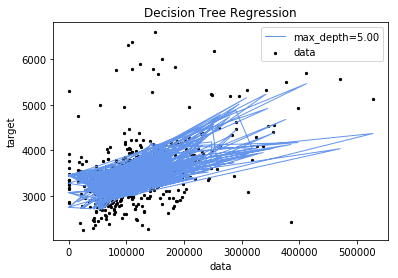

RandomForest: max_depth=10.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.20
MAE: 386.23
MSE: 351502.37
R2-score: 0.20
 


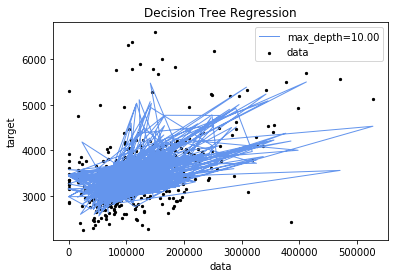

RandomForest: max_depth=15.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.09
MAE: 415.42
MSE: 401411.28
R2-score: 0.09
 


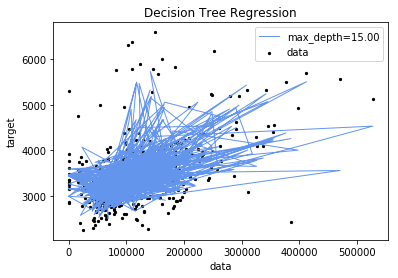

RandomForest: max_depth=20.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.06
MAE: 422.64
MSE: 411712.46
R2-score: 0.06
 


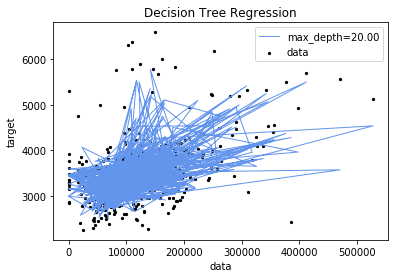

RandomForest: max_depth=25.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.06
MAE: 423.23
MSE: 411825.01
R2-score: 0.06
 


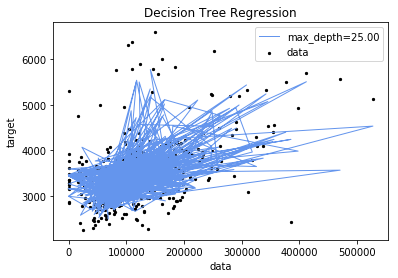

RandomForest: max_depth=30.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.06
MAE: 423.52
MSE: 412253.03
R2-score: 0.06
 


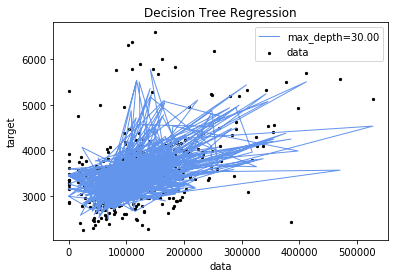

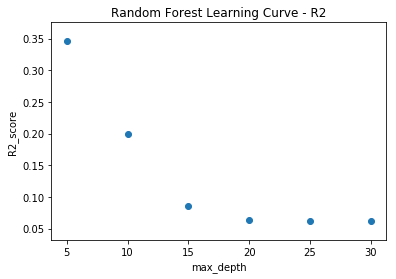

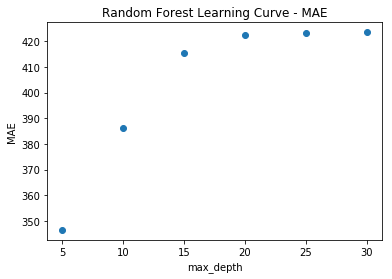

In [21]:
df_Results_1 = RandomForest(['Mean_price_paid','Year'], 100, 'mse', max_depth, 0)

In [22]:
df_Results_1

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
RandomForest: max_depth=5.00,RandomForest,5,"[Mean_price_paid, Year]",0.346400,346.415775,287337.457439,0.346029
RandomForest: max_depth=10.00,RandomForest,10,"[Mean_price_paid, Year]",0.200011,386.225697,351502.367482,0.199991
RandomForest: max_depth=15.00,RandomForest,15,"[Mean_price_paid, Year]",0.086419,415.420627,401411.282173,0.086400
RandomForest: max_depth=20.00,RandomForest,20,"[Mean_price_paid, Year]",0.062981,422.641750,411712.464533,0.062955
RandomForest: max_depth=25.00,RandomForest,25,"[Mean_price_paid, Year]",0.062730,423.231644,411825.013843,0.062699
RandomForest: max_depth=30.00,RandomForest,30,"[Mean_price_paid, Year]",0.061761,423.519434,412253.031680,0.061725


Explained Variance - peaks at 0.34 with a max_depth of 5. This is higher than achieved over the linear or kNN algorithms. But the model still does not deal with the variance in the model.

MAE - the MAE is marginally improved over the equivalent kNN model runs and linear models.

MSE - is still high, reflecting a high risk of a low quality prediction.

R2 - is 0.34, demonstrating the model 'fit' is still poor.

CONCLUSION:

Overall the Random Forest algorithm with feature variables of 'mean price paid', 'year', performs best overall compared to kNN and linear model equivalent runs. A max_depth of 5 appears to provide the optimum achievable fit with these feature variables.

However, an R2 score of 0.34 and a MAE of still >10% compared to the mean for the data set is still not a good enough fit to use the model in earnest. Further improvements through further model refinments, additional possible feature variables or alternative models would be required.

In [23]:
#Export results to csv

In [24]:
df_Results_1.to_csv('2_ModelResults/RandomForest_Results_LA_Liv.csv')

## 2.3.3.2 - Model Training & Evaluation (Feature Variables = Mean Price Paid, Year, X, Y)

Location as a feature variable is expected to improve the model and support better management of the variance in the data set.

Location is denoted by two feature variables 'X' and 'Y' which represent the X, Y OS Coordinates of the population weighted centroid for each LSOA. Both are therefore implemented within the same model run.

The hyperparameters varied within the below model runs are:

1. Number of estimators - which is the number of trees in the forest, the default is set to 100 and increasing substantially has a knock on to run time.
2. Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
3. Maximum depth of the tree - aka number of branches - the default is none with the model running until pure. The below runs through a series of model runs over a range of max_depth between 5 to 40, and none, to determine which max_depth provides the best fit model.
4. Random State - It is not known the impact of this hyperparameter so a series of runs have again been trialled, on this occasion set to zero.

All other hyperparameters are not specified and set to the default values.

In [25]:
max_depth = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

RandomForest: max_depth=5.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.66
MAE: 281.16
MSE: 150977.45
R2-score: 0.66
 


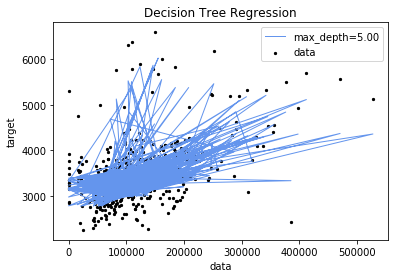

RandomForest: max_depth=6.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.70
MAE: 262.23
MSE: 131930.13
R2-score: 0.70
 


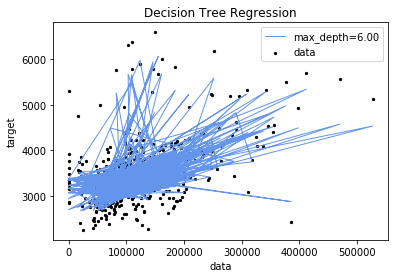

RandomForest: max_depth=7.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.74
MAE: 244.36
MSE: 114996.07
R2-score: 0.74
 


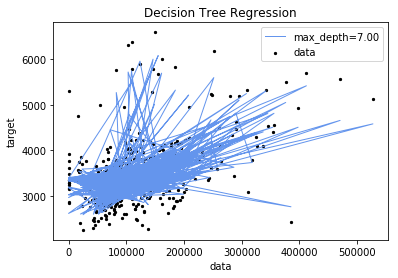

RandomForest: max_depth=8.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.78
MAE: 227.19
MSE: 99443.78
R2-score: 0.77
 


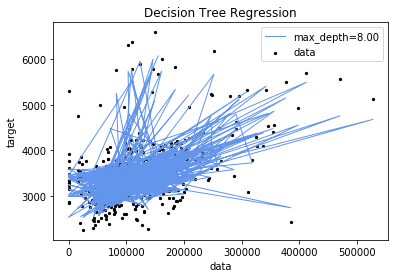

RandomForest: max_depth=9.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.80
MAE: 213.46
MSE: 87291.97
R2-score: 0.80
 


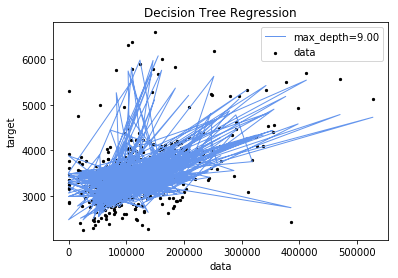

RandomForest: max_depth=10.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.82
MAE: 202.90
MSE: 79591.24
R2-score: 0.82
 


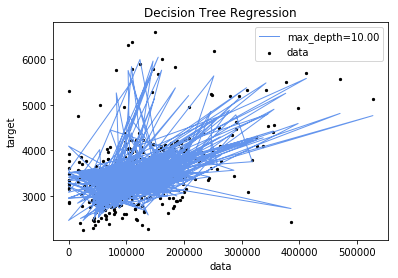

RandomForest: max_depth=11.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.83
MAE: 193.63
MSE: 73384.61
R2-score: 0.83
 


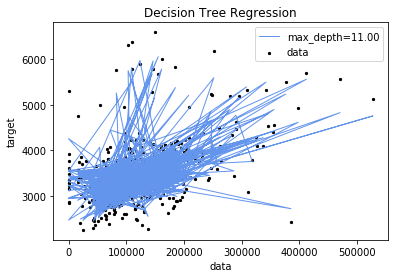

RandomForest: max_depth=12.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.84
MAE: 187.78
MSE: 70149.43
R2-score: 0.84
 


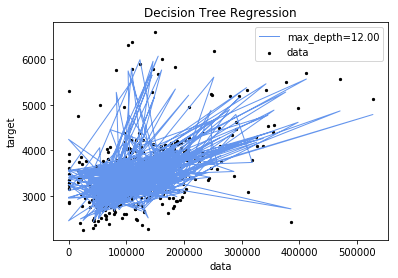

RandomForest: max_depth=13.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.85
MAE: 184.75
MSE: 68082.48
R2-score: 0.85
 


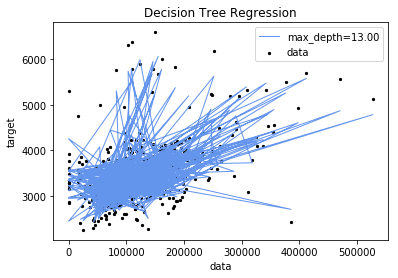

RandomForest: max_depth=14.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.85
MAE: 181.47
MSE: 67127.47
R2-score: 0.85
 


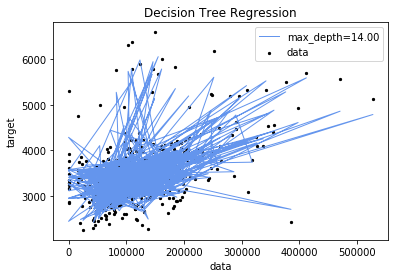

RandomForest: max_depth=15.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.85
MAE: 180.21
MSE: 66018.93
R2-score: 0.85
 


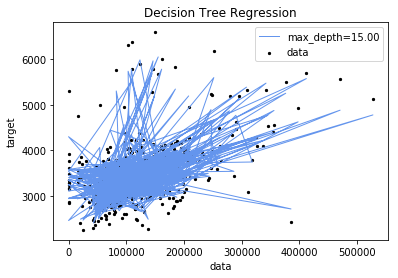

RandomForest: max_depth=16.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.85
MAE: 179.08
MSE: 65826.54
R2-score: 0.85
 


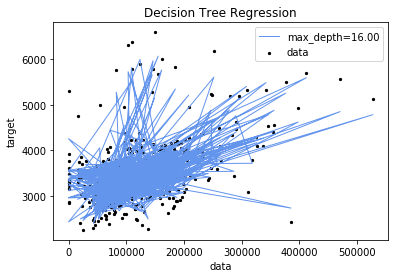

RandomForest: max_depth=17.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.85
MAE: 178.26
MSE: 65387.03
R2-score: 0.85
 


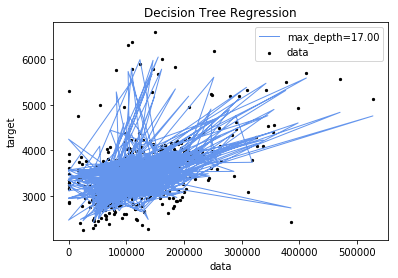

RandomForest: max_depth=18.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.85
MAE: 177.57
MSE: 65186.54
R2-score: 0.85
 


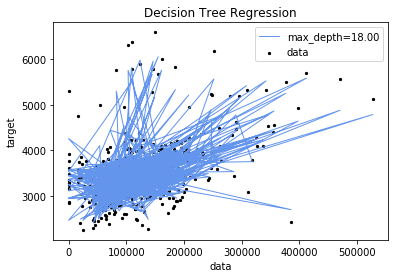

RandomForest: max_depth=19.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.85
MAE: 179.06
MSE: 65791.88
R2-score: 0.85
 


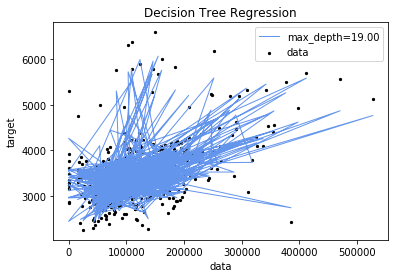

RandomForest: max_depth=20.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.85
MAE: 178.04
MSE: 65689.75
R2-score: 0.85
 


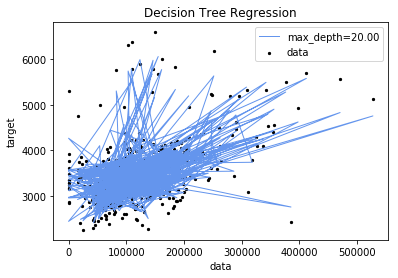

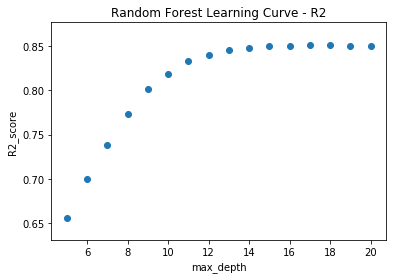

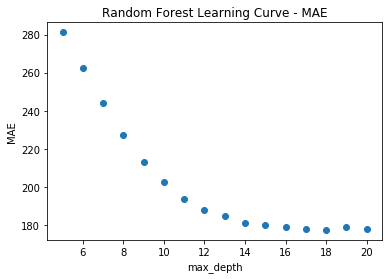

In [26]:
df_Results_2 = RandomForest(['Mean_price_paid','Year', 'X', 'Y'], 100, 'mse', max_depth, 0)

In [27]:
df_Results_2

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
RandomForest: max_depth=5.00,RandomForest,5,"[Mean_price_paid, Year, X, Y]",0.658376,281.160328,150977.447863,0.656380
RandomForest: max_depth=6.00,RandomForest,6,"[Mean_price_paid, Year, X, Y]",0.702060,262.232117,131930.132724,0.699731
RandomForest: max_depth=7.00,RandomForest,7,"[Mean_price_paid, Year, X, Y]",0.740643,244.359640,114996.065541,0.738272
RandomForest: max_depth=8.00,RandomForest,8,"[Mean_price_paid, Year, X, Y]",0.775709,227.193575,99443.776108,0.773669
RandomForest: max_depth=9.00,RandomForest,9,"[Mean_price_paid, Year, X, Y]",0.803034,213.461348,87291.966257,0.801326
RandomForest: max_depth=10.00,RandomForest,10,"[Mean_price_paid, Year, X, Y]",0.820224,202.899187,79591.235271,0.818853
RandomForest: max_depth=11.00,RandomForest,11,"[Mean_price_paid, Year, X, Y]",0.834161,193.629507,73384.605642,0.832979
RandomForest: max_depth=12.00,RandomForest,12,"[Mean_price_paid, Year, X, Y]",0.841273,187.783177,70149.430864,0.840342
RandomForest: max_depth=13.00,RandomForest,13,"[Mean_price_paid, Year, X, Y]",0.845930,184.754442,68082.484072,0.845046
RandomForest: max_depth=14.00,RandomForest,14,"[Mean_price_paid, Year, X, Y]",0.848010,181.472128,67127.471410,0.847220


Explained Variance - improvement appears to be levelling off at 10-15 max_depth at 0.85. This is higher than achieved over the linear or kNN algorithms and the earlier Random Forest model run without the location parameters. The model is dealing much better with variance.

MAE - the MAE is significantly improved over the equivalent kNN model runs and linear models and predicts within ~4-5% of the mean electricity consumption for the data set.

MSE - is also improved.

R2 - also appears to be levelling out at 0.85, demonstrating the model 'fit' is relatively 'good'.

CONCLUSION:

Overall the Random Forest algorithm with feature variables of 'mean price paid', 'year', 'X' and 'Y' performs best overall compared to kNN and linear model equivalent runs. A max_depth of 10-15 appears to provide the optimum achievable fit with these feature variables.

The model is substantially improved compared to earlier algorithm/model choice and runs (differing feature variables and hyperparameters) and is considered to predict reasonably well, but improvements could still be sought. 

Liverpool compared to Pembrokeshire doesn't predict as well, this is expected to be due to the urban nature of Liverpool LSOAs resulting in a greater variety and style of dwelling.

In [28]:
#Export results to csv

In [29]:
df_Results_2.to_csv('2_ModelResults/RandomForest_Results_LA_Liv2.csv')

## 2.3.4 - Final Run & Results Printing

Re-run the model with the identified optimum hyperparameters.

In [30]:
#Define the model
regr = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=11, random_state=0)

In [31]:
#Set the training data
x_train = np.asanyarray(train[['Mean_price_paid','Year', 'X', 'Y']])
y_train = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])

In [32]:
#Train the model on the set training data
regr.fit(x_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
#Predict results using the trained model and the previously defined test data
y_hat = regr.predict(test[['Mean_price_paid','Year', 'X', 'Y']])

In [34]:
x_test = np.asanyarray(test[['Mean_price_paid','Year', 'X', 'Y']])
y_test = np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']])

In [35]:
#Check the shape of the data
y_test = np.squeeze(y_test)
y_test.shape

(537,)

In [36]:
#Run evaluation metrics to check the model performance & print results to notebook
print("RandomForest: max_depth=11" , ['Mean_price_paid','Year', 'X', 'Y'], ['Pembrokeshire'])
print("Explained Variance Score: %.2f" % explained_variance_score(y_test, y_hat))
print("MAE: %.2f" % mean_absolute_error(y_test, y_hat))
print("MSE: %.2f" % mean_squared_error(y_test, y_hat))
print("R2-score: %.2f" % r2_score(y_test, y_hat))
print(" ")

RandomForest: max_depth=11 ['Mean_price_paid', 'Year', 'X', 'Y'] ['Pembrokeshire']
Explained Variance Score: 0.83
MAE: 193.63
MSE: 73384.61
R2-score: 0.83
 


In [54]:
#Set up dataframe of evaluation metrics

df_Metrics = pd.DataFrame({'Explained Variance Score': [explained_variance_score(y_test, y_hat)]},
                  index=["RandomForest: max_depth=11, 'Mean_price_paid','Year', 'X', 'Y', 'Liverpool'"])
df_Metrics.insert(1,'MAE', mean_absolute_error(y_test, y_hat))
df_Metrics.insert(2,'MSE', mean_squared_error(y_test, y_hat))
df_Metrics.insert(3,'R2_score', r2_score(y_test, y_hat))
df_Metrics.insert(0, 'Model', 'RandomForest')
df_Metrics.insert(1, 'max_depth', '11')
df_Metrics.insert(2, 'Model_Region', 'Liverpool')
df_Metrics.insert(3, 'Feature Variables', "'Mean_price_paid','Year', 'X', 'Y'")  

In [55]:
df_Metrics

,Model,max_depth,Model_Region,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
"RandomForest: max_depth=11, 'Mean_price_paid','Year', 'X', 'Y', 'Liverpool'",RandomForest,11,Liverpool,"'Mean_price_paid','Year', 'X', 'Y'",0.834161,193.629507,73384.605642,0.832979


Print predicted electricity results to df and .csv.

In [56]:
#Set up temporary results df
df = pd.DataFrame({'Predicted_Electricity_Consumption_kWH': y_hat})

In [57]:
df_ResultsValues = df_test

In [58]:
df_ResultsValues.insert(12,'Predicted_Electricity_Consumption_kWH', y_hat)

ValueError: cannot insert Predicted_Electricity_Consumption_kWH, already exists

In [ ]:
df_ResultsValues

In [59]:
plt.rcParams['figure.figsize'] = [16, 10]

In [60]:
plt.style.use('seaborn-darkgrid')

In [61]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('axes', titlesize=20) 

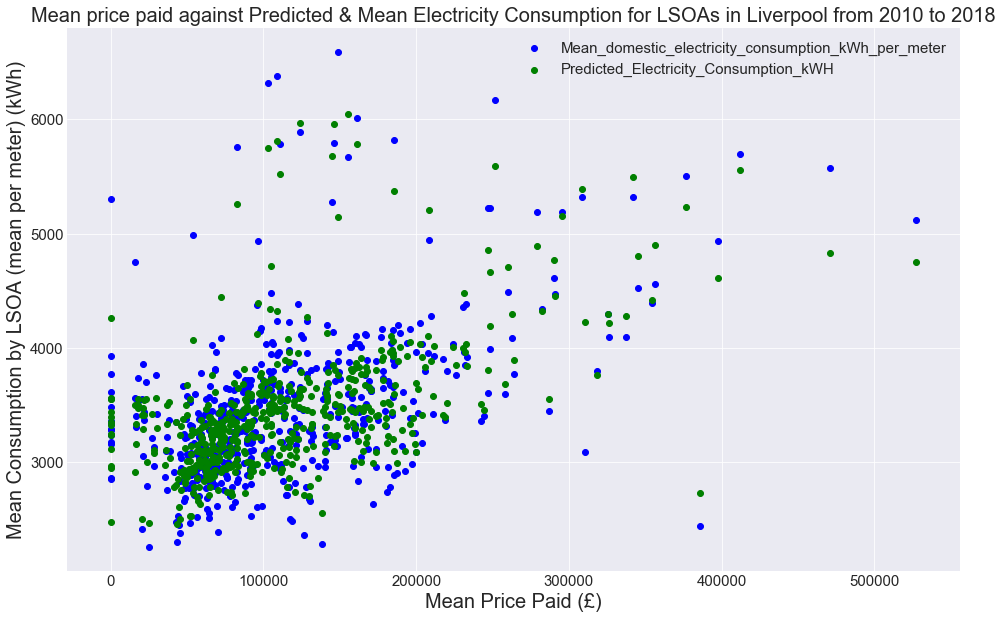

In [62]:
plt.scatter(df_ResultsValues.Mean_price_paid, df_ResultsValues.Mean_domestic_electricity_consumption_kWh_per_meter, color='blue')
plt.scatter(df_ResultsValues.Mean_price_paid, df_ResultsValues.Predicted_Electricity_Consumption_kWH, color='green')
plt.xlabel("Mean Price Paid (£)")
plt.ylabel("Mean Consumption by LSOA (mean per meter) (kWh)")
plt.legend(fontsize=15)
plt.title("Mean price paid against Predicted & Mean Electricity Consumption for LSOAs in Liverpool from 2010 to 2018")
plt.show()

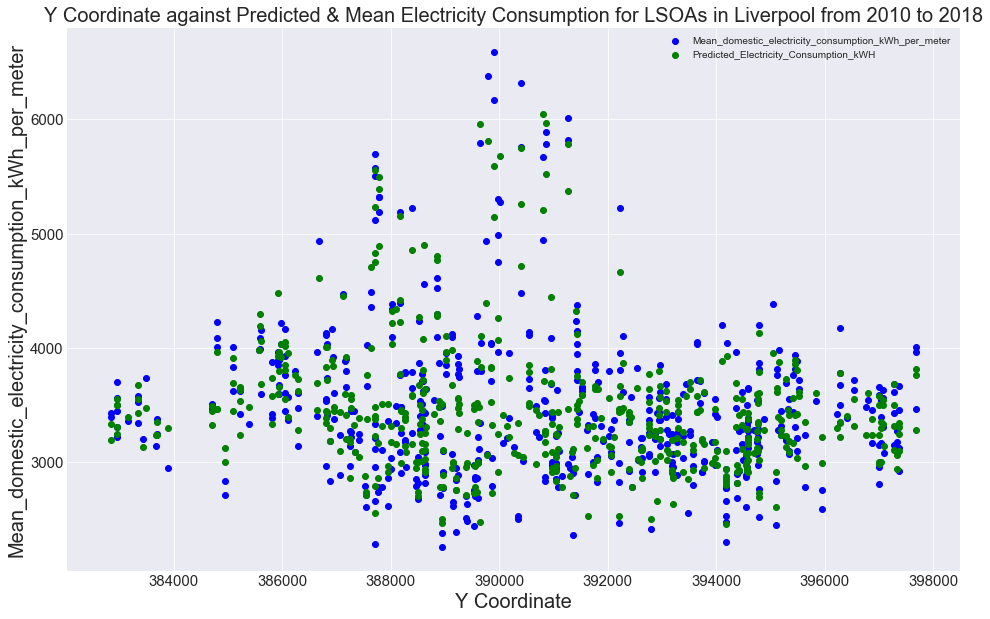

In [63]:
plt.scatter(df_ResultsValues.Y, df_ResultsValues.Mean_domestic_electricity_consumption_kWh_per_meter, color='blue')
plt.scatter(df_ResultsValues.Y, df_ResultsValues.Predicted_Electricity_Consumption_kWH, color='green')
plt.xlabel("Y Coordinate")
plt.ylabel("Mean_domestic_electricity_consumption_kWh_per_meter")
plt.legend()
plt.title("Y Coordinate against Predicted & Mean Electricity Consumption for LSOAs in Liverpool from 2010 to 2018")
plt.show()

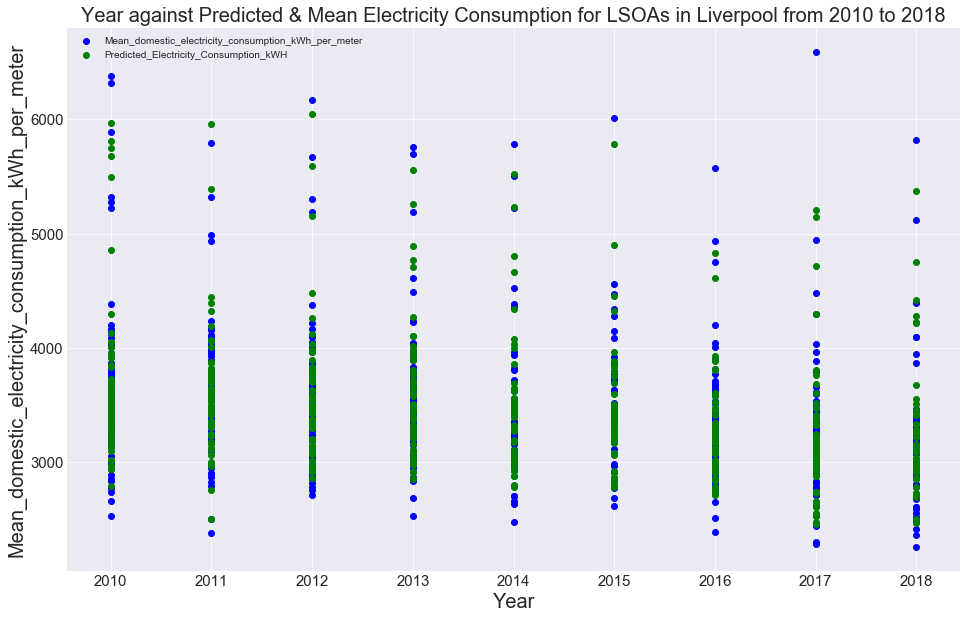

In [64]:
plt.scatter(df_ResultsValues.Year, df_ResultsValues.Mean_domestic_electricity_consumption_kWh_per_meter, color='blue')
plt.scatter(df_ResultsValues.Year, df_ResultsValues.Predicted_Electricity_Consumption_kWH, color='green')
plt.xlabel("Year")
plt.ylabel("Mean_domestic_electricity_consumption_kWh_per_meter")
plt.legend()
plt.title("Year against Predicted & Mean Electricity Consumption for LSOAs in Liverpool from 2010 to 2018")
plt.show()

Check on the most influencing feature variables. 

Location 'X' coordinate in this instance is the strongest influencer, with mean price second. Year has little influence.

In [49]:
regr.feature_importances_

array([0.29789658, 0.13860174, 0.34499791, 0.21850377])

In [50]:
#Export results to csv

In [51]:
df_ResultsValues.to_csv('2_ModelResults/PredictedValues/RandomForest_LA_Liverpool.csv')

In [52]:
df_Metrics.to_csv('2_ModelResults/PredictedValues/RandomForest_LA_Liverpool_ME.csv')

In [53]:
#END